<a href="https://colab.research.google.com/github/UdayKhunt/Machine-Learning-Projects/blob/main/Medical_Insurance_Cost_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [2]:
insurance_data = pd.read_csv('/content/insurance.csv')

In [3]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
sns.set()

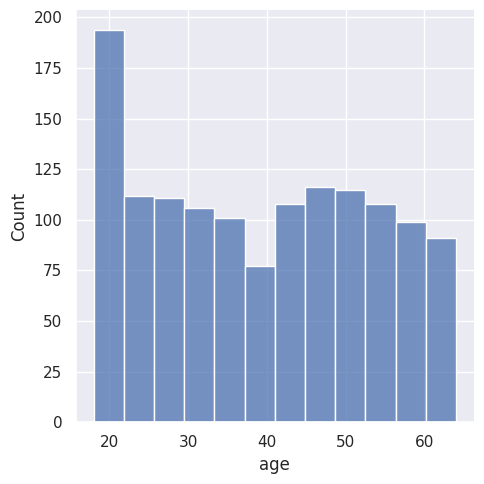

In [6]:
sns.displot(x='age',data=insurance_data)

<Axes: xlabel='sex', ylabel='count'>

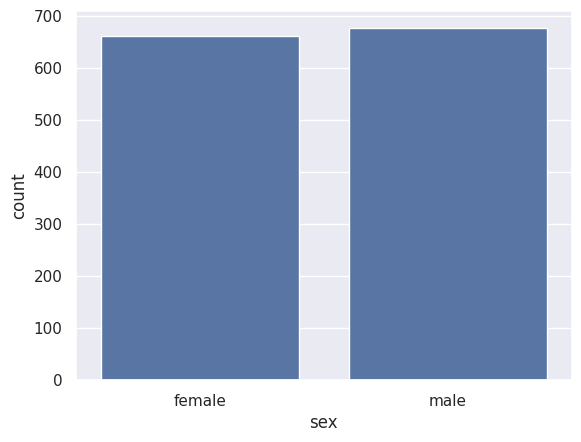

In [7]:
sns.countplot(x='sex',data=insurance_data)

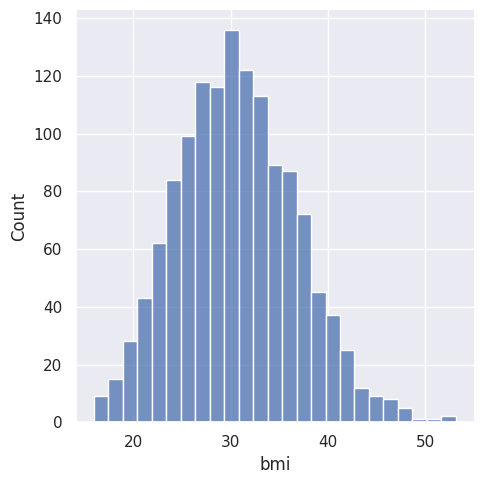

In [8]:
sns.displot(x='bmi',data=insurance_data)

<Axes: xlabel='children', ylabel='count'>

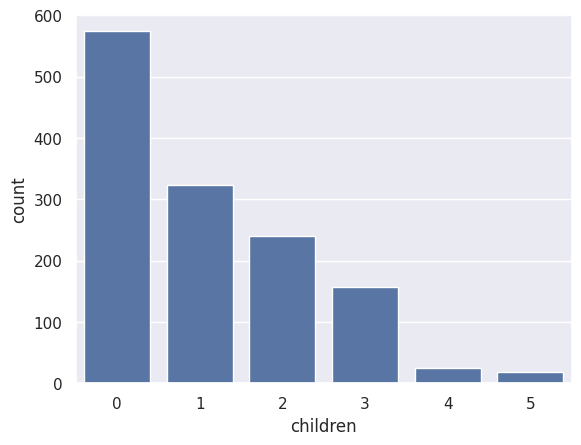

In [9]:
sns.countplot(x='children',data=insurance_data)

<Axes: xlabel='smoker', ylabel='count'>

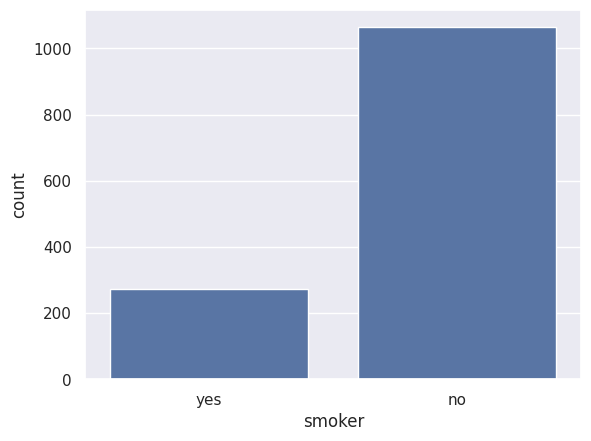

In [10]:
sns.countplot(x='smoker',data=insurance_data)

<Axes: xlabel='region', ylabel='count'>

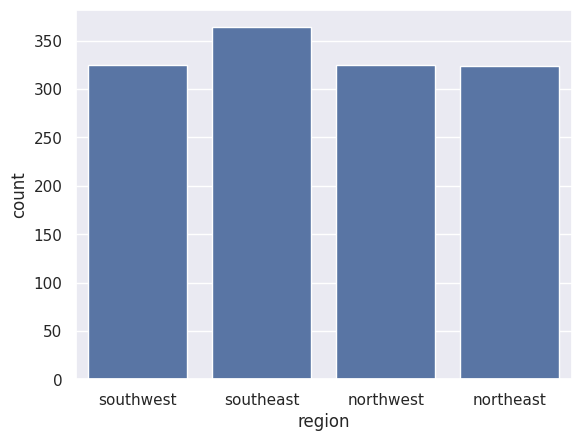

In [11]:
sns.countplot(x='region',data=insurance_data)

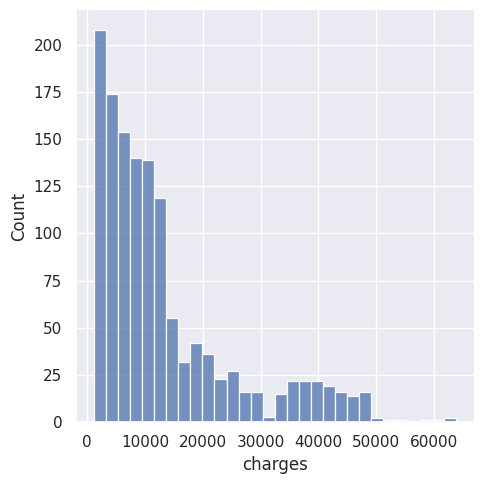

In [12]:
sns.displot(x='charges',data=insurance_data)

In [13]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [14]:
insurance_data['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [15]:
insurance_data.replace({'sex' : {'female' : 1 , 'male' : 0} , 'smoker' : {'yes' : 1 , 'no' : 0} , 'region' : {'northeast' : 2 , 'northwest' : 3 , 'southeast' : 0 , 'southwest' : 1}}, inplace=True)

In [16]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


In [17]:
X=insurance_data.drop(['charges'],axis=1)
Y=insurance_data['charges']

In [18]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=2,test_size=.2)

In [19]:
regressor=LinearRegression()

In [20]:
regressor.fit(X_train,Y_train)

LinearRegression()

In [21]:
training_data_prediction = regressor.predict(X_train)

In [22]:
error_score = metrics.r2_score(training_data_prediction , Y_train)
print(error_score)

0.6693380032904606


In [23]:
test_data_prediction =regressor.predict(X_test)

In [24]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print(error_score)

0.7447273869684076


In [25]:
input_data = (52,1,30.78,1,0,2)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = regressor.predict(input_data_reshaped)
print('The Insurance cost in USD is ',prediction[0])

The Insurance cost in USD is  11710.765087870983


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
